## Implementation of the svc  

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
## create a  datasets 
from sklearn.datasets import make_classification

In [30]:
x,y= make_classification(n_samples=1000 , n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [31]:
x,y

(array([[-2.1421488 , -0.2061536 ],
        [-1.14286824, -0.64586456],
        [ 3.2456278 ,  3.21980268],
        ...,
        [-0.6563609 ,  0.58702589],
        [-0.12682304,  0.28986784],
        [ 0.21295871,  0.50713396]], shape=(1000, 2)),
 array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 1

In [32]:
pd.DataFrame(x)[0]

0     -2.142149
1     -1.142868
2      3.245628
3     -0.042799
4      1.183164
         ...   
995    0.820393
996    0.749568
997   -0.656361
998   -0.126823
999    0.212959
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

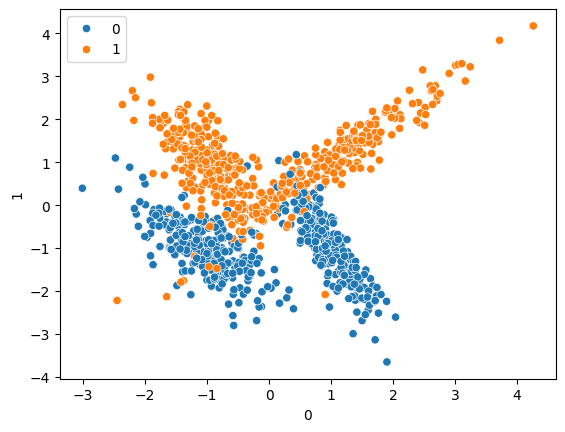

In [33]:
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=10)

In [35]:
## now implementaion of the svc
from sklearn.svm import SVC

In [36]:
svc = SVC(kernel= 'linear')

In [37]:
svc.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [38]:
y_pred = svc.predict(x_test)

In [39]:
from sklearn.metrics import classification_report ,confusion_matrix

In [40]:
confusion_matrix(y_test , y_test)

array([[167,   0],
       [  0, 133]])

In [41]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       167
           1       0.88      0.90      0.89       133

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [42]:
rbf = SVC(kernel= 'rbf')

In [43]:
rbf.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:
y_pred1 = rbf.predict(x_test)

In [45]:
confusion_matrix(y_test , y_pred1)

array([[152,  15],
       [  7, 126]])

In [46]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       167
           1       0.89      0.95      0.92       133

    accuracy                           0.93       300
   macro avg       0.92      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [47]:
poly = SVC(kernel= 'poly')
poly.fit(x_train,y_train)
y_pred2 = poly.predict(x_test)
print(confusion_matrix(y_test , y_pred2))
print(classification_report(y_test,y_pred2))

[[138  29]
 [  6 127]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       167
           1       0.81      0.95      0.88       133

    accuracy                           0.88       300
   macro avg       0.89      0.89      0.88       300
weighted avg       0.89      0.88      0.88       300



In [48]:
sig = SVC(kernel= 'sigmoid' )
sig.fit(x_train,y_train)
y_pred3 = poly.predict(x_test)
print(confusion_matrix(y_test , y_pred3))
print(classification_report(y_test,y_pred3))

[[138  29]
 [  6 127]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       167
           1       0.81      0.95      0.88       133

    accuracy                           0.88       300
   macro avg       0.89      0.89      0.88       300
weighted avg       0.89      0.88      0.88       300



# hyperparameters tuneing 

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = [
  
  {'C': [0.1, 1, 10, 100], 
   'gamma': [1, 0.1, 0.01, 0.001], 
   'kernel': ['rbf']}
]

In [51]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [52]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.971 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.914 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

,estimator,SVC()
,param_grid,"[{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [53]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [54]:
y_pred4 = grid.predict(x_test)
print(confusion_matrix(y_test , y_pred4))
print(classification_report(y_test,y_pred4))

[[155  12]
 [  7 126]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       167
           1       0.91      0.95      0.93       133

    accuracy                           0.94       300
   macro avg       0.93      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



## Svm (support vector machine use ABF kernal which work like this ) make all the point spread in 3D plane 

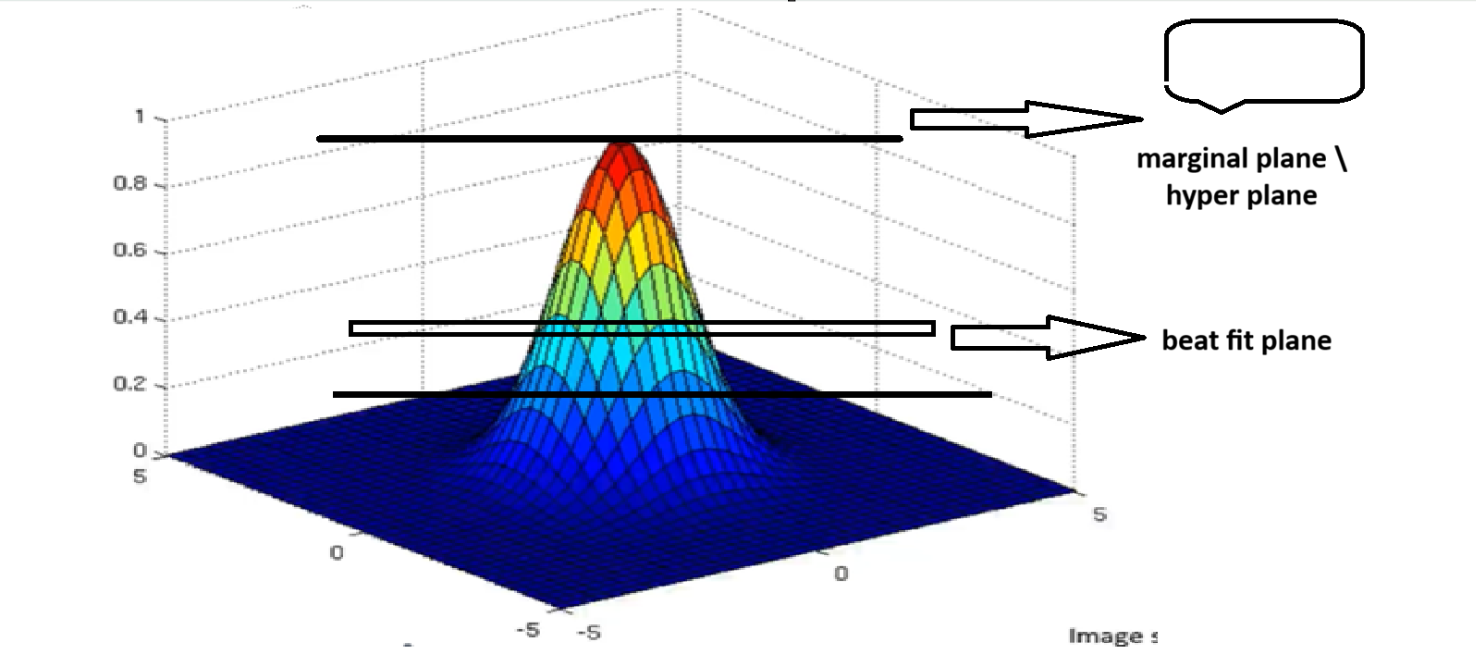